**3 Poging 2**

In [40]:
import pandas as pd   #inladen bibliotheken           
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import statsmodels.stats.api as sms    
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.regression as sr
import statsmodels as st 
from scipy import stats

In [41]:
df = pd.read_csv('etmgeg2.csv',sep=',') #Dataset inladen
df_filtered = df[df['Jaar'] >= 1957] #De data vanaf 1957 selecteren
df = df_filtered[2:] #Data vanaf 31-8-1957 selecteren, omdat de twee datums ervoor ontbrekende waarden zijn voor Verdamping
df


,Datum,Jaar,Maand,Dag,Staatshoofd,WindrVec,WindrCat9,WindrCat5,Windsnelh,WindsnelhGem,...,ZichtMaxCat85,ZichtMaxCat5,ZichtMaxUur,BewolkingGem,VochtighGem,VochtighMax,VochtighMaxUur,VochtighMin,VochtighMinUur,Verdamping
170,31-8-1957,1957,8,31,Juliana,295.0,NW,W,2.6,3.6,...,17-18 km,goed,21.0,7/8,84,97.0,1.0,69.0,14.0,1.5
171,27-4-1958,1958,4,27,Juliana,278.0,W,W,9.3,9.8,...,30-35 km,uitstekend,11.0,5/8,83,91.0,1.0,69.0,10.0,1.3
172,30-4-1958,1958,4,30,Juliana,307.0,NW,W,1.0,2.6,...,15-16 km,goed,12.0,5/8,79,97.0,24.0,59.0,12.0,2.4
173,31-8-1958,1958,8,31,Juliana,112.0,O,O,1.5,3.6,...,13-14 km,redelijk,15.0,6/8,85,100.0,9.0,57.0,15.0,1.8
174,27-4-1959,1959,4,27,Juliana,194.0,Z,Z,5.7,6.2,...,22-23 km,goed,15.0,7/8,84,97.0,3.0,63.0,15.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,27-4-2023,2023,4,27,Willem-Alexander,117.0,ZO,O,2.5,2.9,...,45-50 km,uitstekend,8.0,7/8,61,98.0,2.0,39.0,13.0,3.0
367,30-4-2023,2023,4,30,Willem-Alexander,99.0,O,O,1.7,1.9,...,45-50 km,uitstekend,14.0,6/8,73,98.0,2.0,45.0,16.0,3.2
368,31-8-2023,2023,8,31,Willem-Alexander,260.0,W,W,2.0,2.7,...,45-50 km,uitstekend,10.0,6/8,78,97.0,6.0,49.0,13.0,3.1
369,27-4-2024,2024,4,27,Willem-Alexander,131.0,ZO,O,2.3,2.9,...,45-50 km,uitstekend,16.0,8/8,80,93.0,2.0,61.0,16.0,1.9


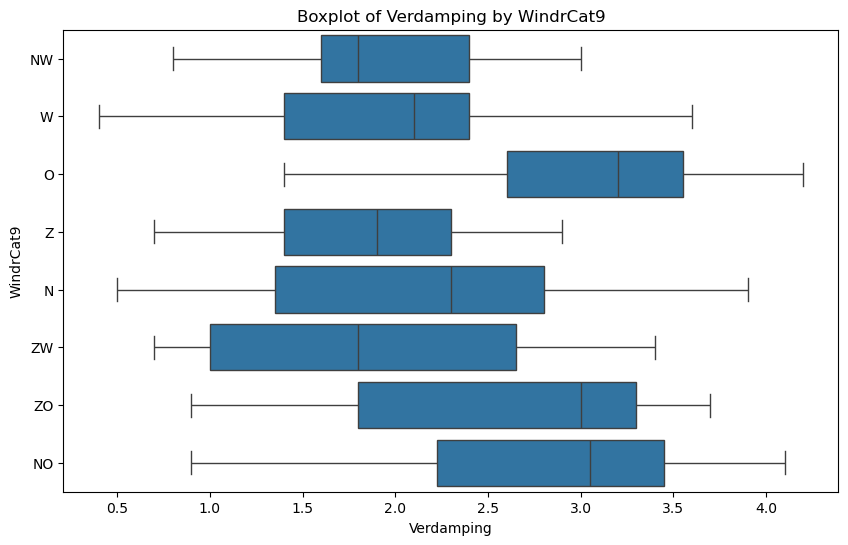

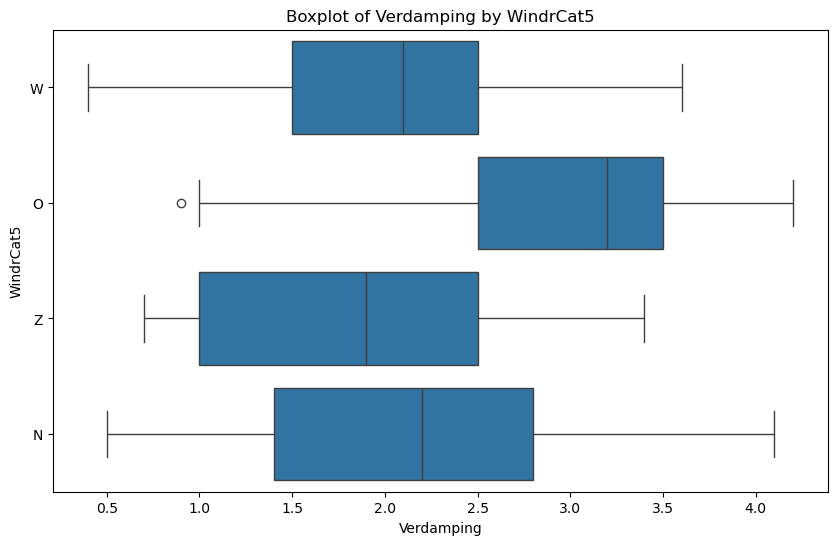

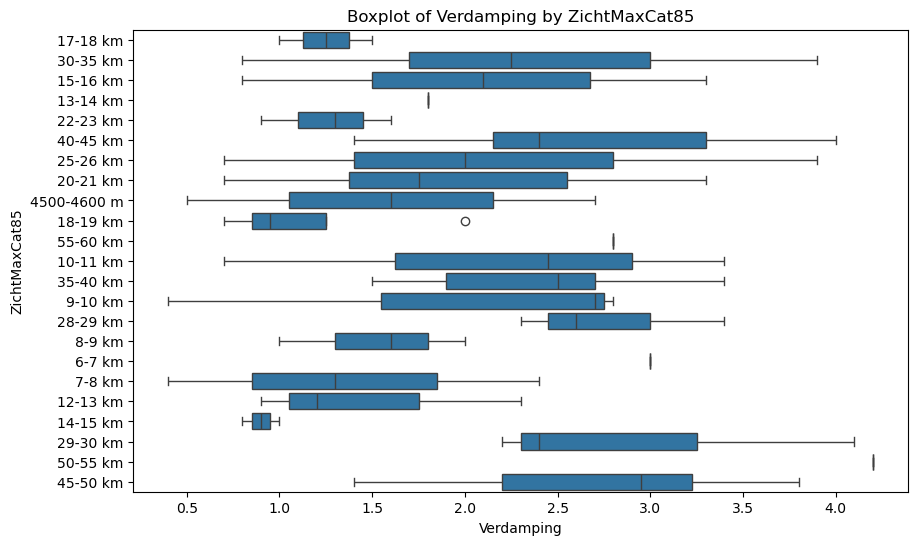

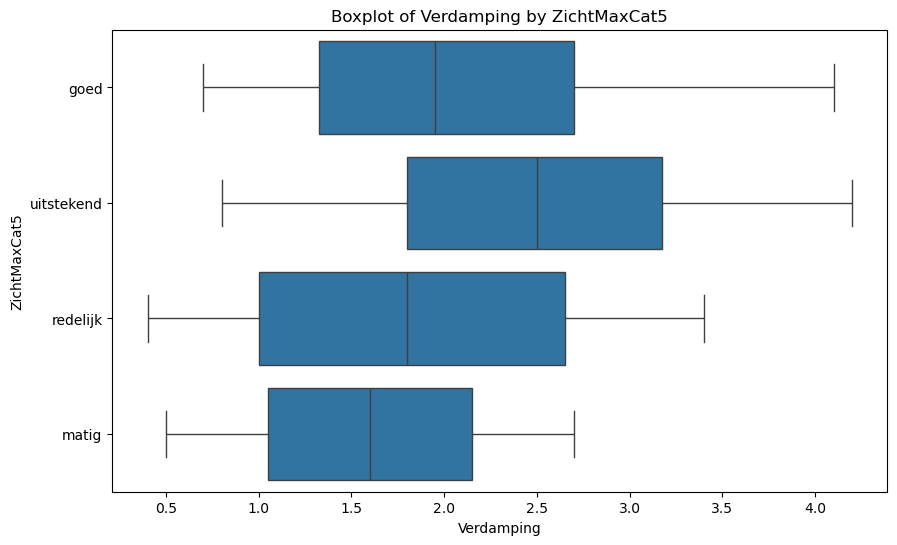

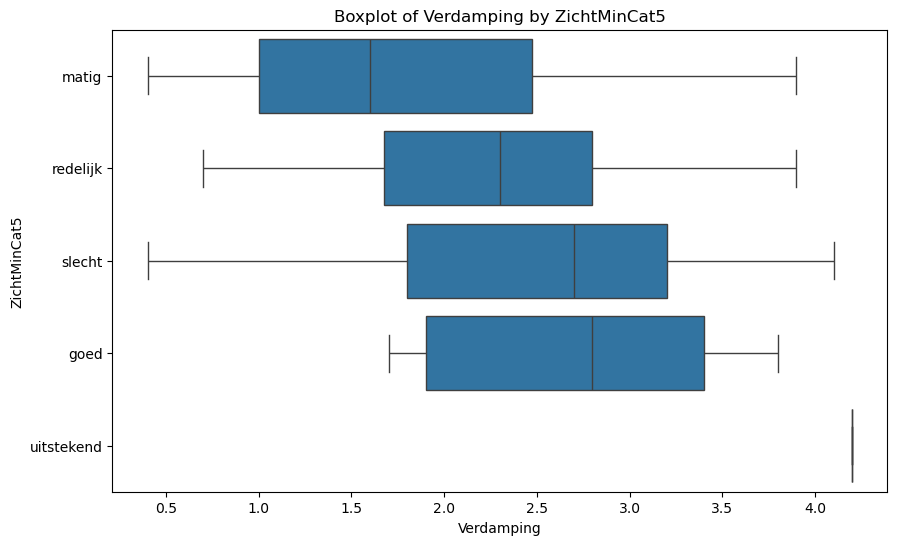

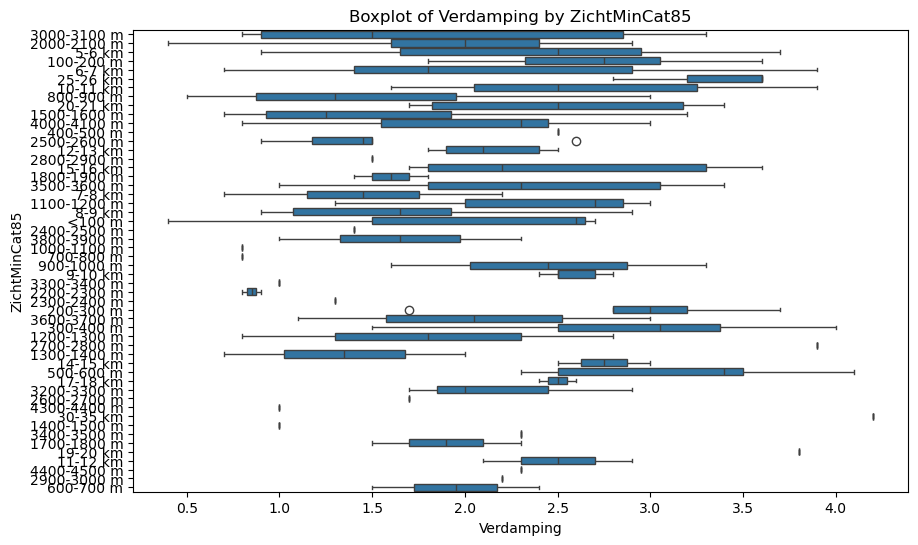

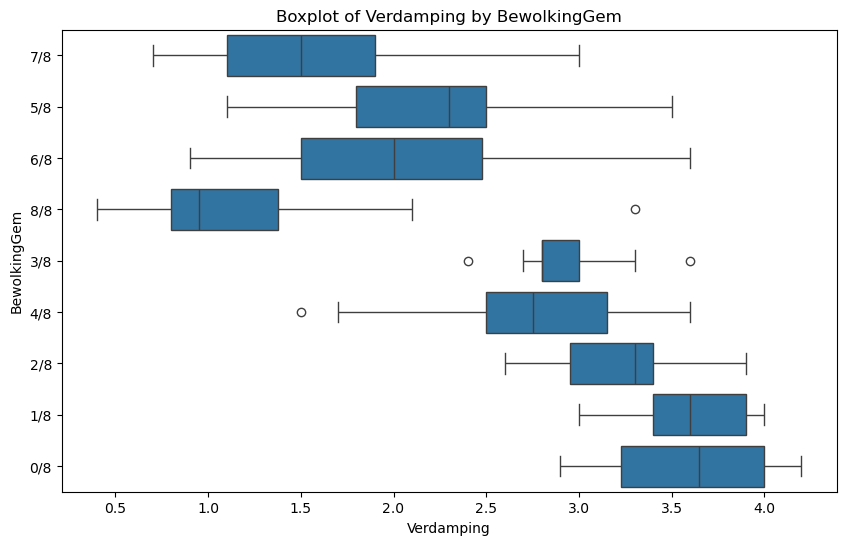

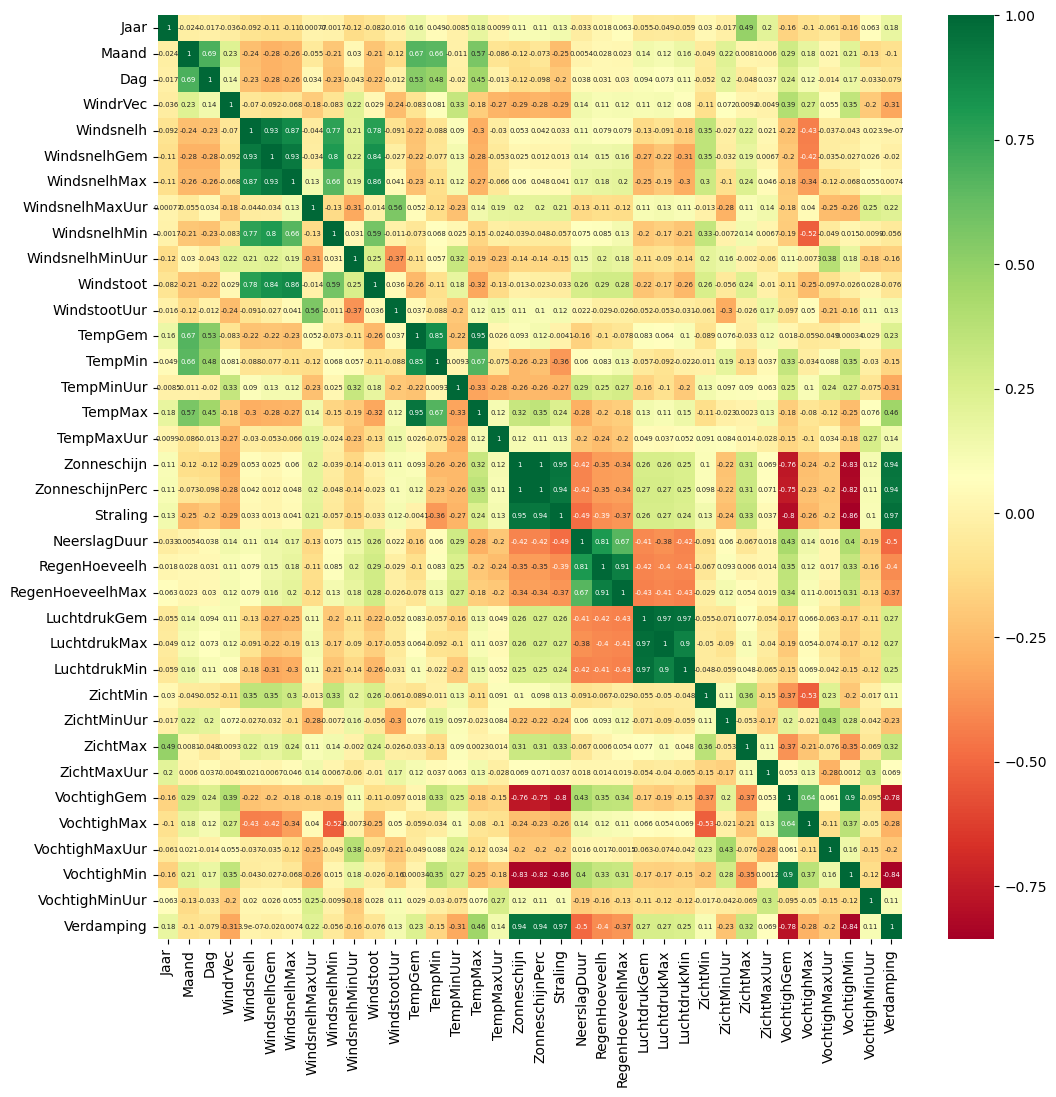

In [42]:
# We hebben boxplots geplot om de verdeling van variabelen per categorie te bekijken.
categ_kolommen = ['WindrCat9', 'WindrCat5', 'ZichtMaxCat85', 'ZichtMaxCat5', 'ZichtMinCat5', 'ZichtMinCat85', 'BewolkingGem'] 
for kolom in categ_kolommen:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Verdamping'], y=df[kolom])
    plt.title(f'Boxplot of Verdamping by {kolom}')
    plt.xlabel('Verdamping')
    plt.ylabel(kolom)
    plt.show()  



# Daarnaast hebben we ook een heatmap  geplot om de correlaties tussen de numerieke variabelen te bekijken.  
# Hierbij is te zien dat de donkergroene en donkerrode de sterkste correlatie hebben. 
plt.figure(figsize=(12, 12))
heat = sns.heatmap(df.corr(numeric_only = True), cmap="RdYlGn", annot=True, annot_kws={"fontsize": 5})
plt.show()

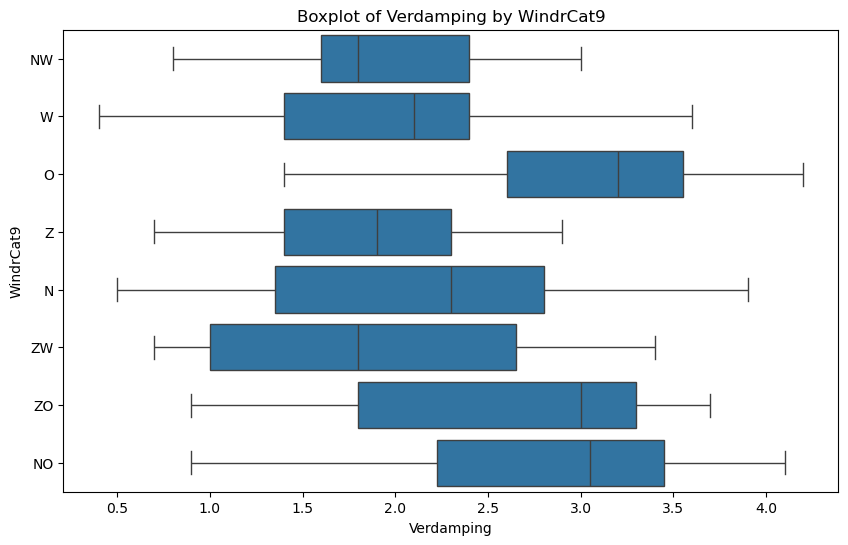

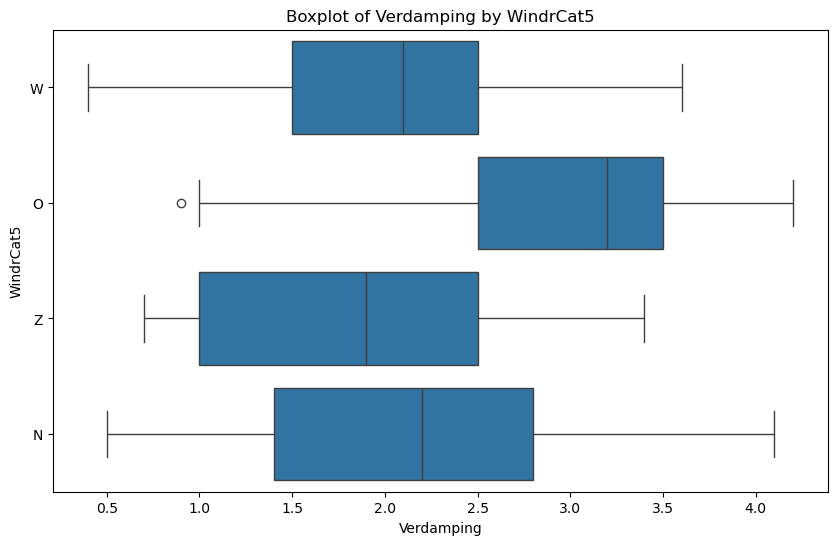

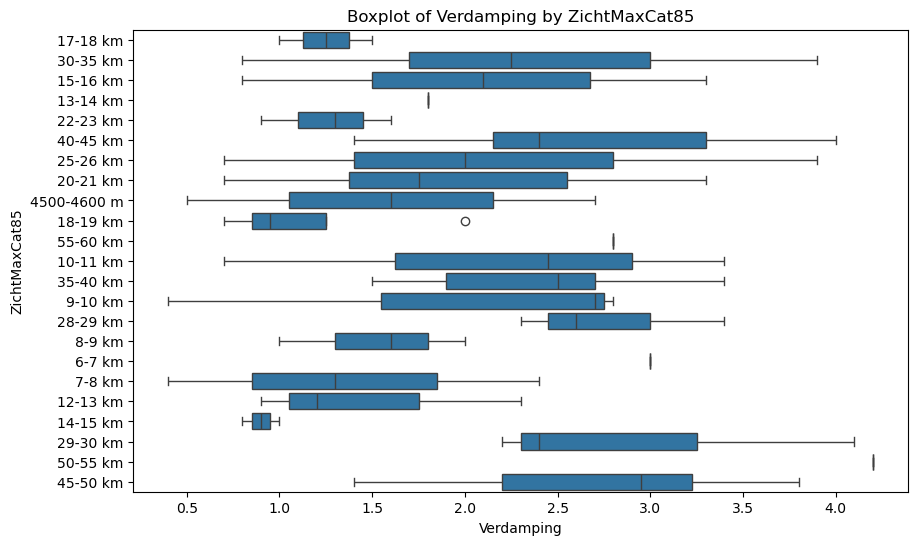

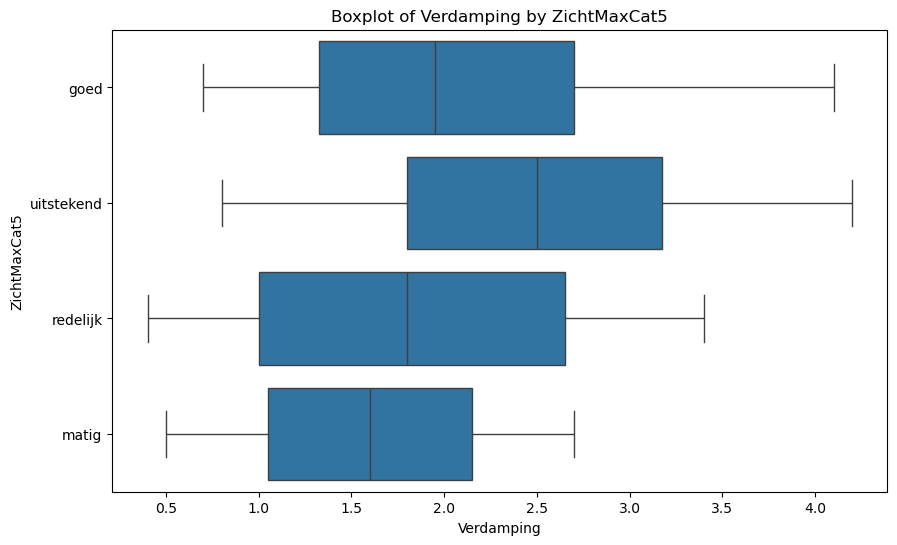

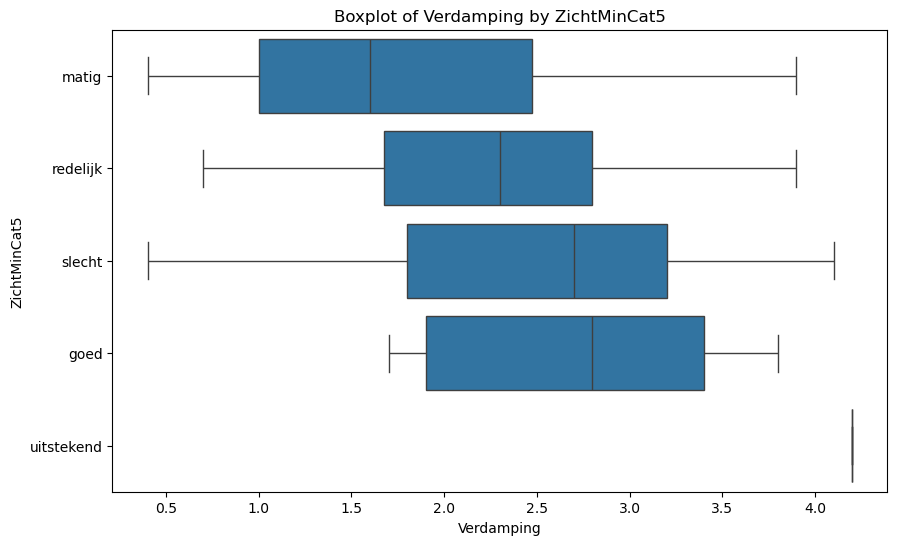

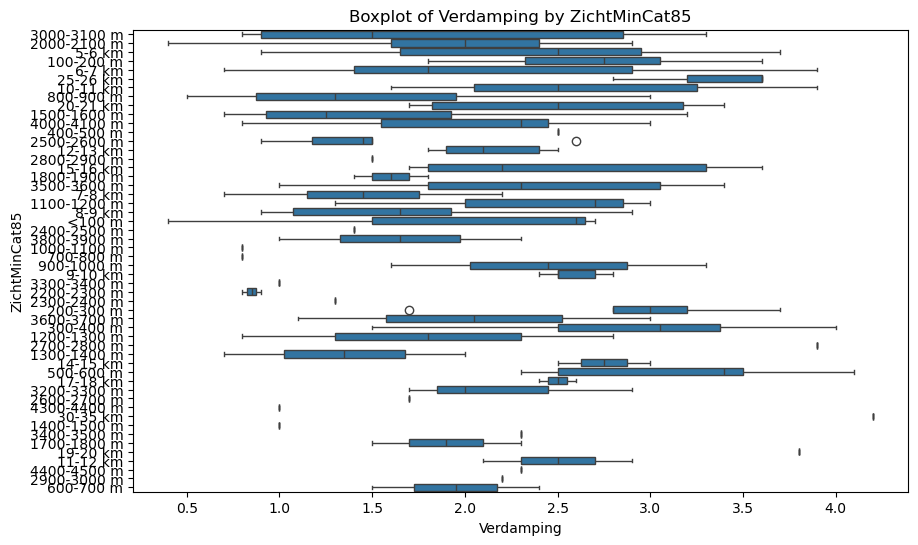

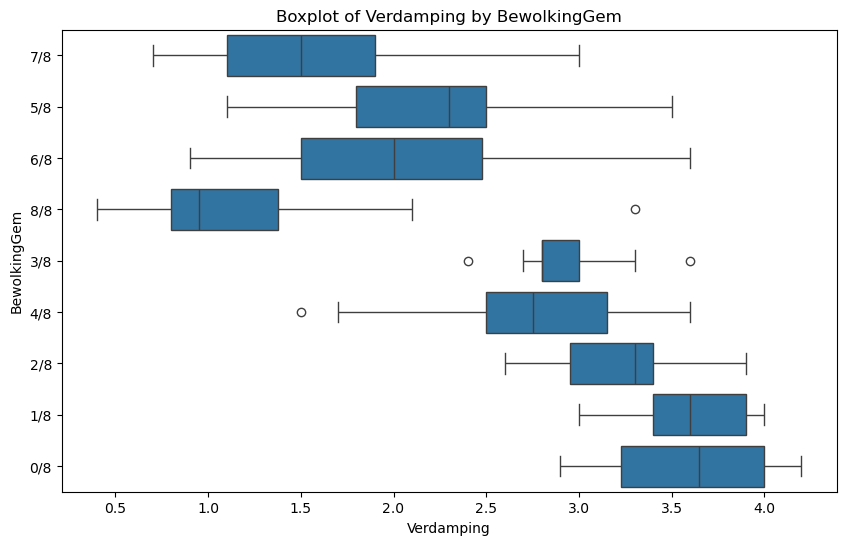

In [43]:
# We hebben boxplots geplot om de verdeling van variabelen per categorie te bekijken.
categ_kolommen = ['WindrCat9', 'WindrCat5', 'ZichtMaxCat85', 'ZichtMaxCat5', 'ZichtMinCat5', 'ZichtMinCat85', 'BewolkingGem'] 
for kolom in categ_kolommen:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Verdamping'], y=df[kolom])
    plt.title(f'Boxplot of Verdamping by {kolom}')
    plt.xlabel('Verdamping')
    plt.ylabel(kolom)
    plt.show()  

Bij de boxplotten is te zien dat de categoriën van variabelen klein zijn. Wij hebben ervoor gekozen om categoriën te combineren zodat het de gegevens makkelijker maakt om te begrijpen, patronen te vinden en bij het maken van betere/grotere boxplotten. Verder maken we ook dummy variabelen van de categorische variabelen om de gegevens te kunnen verwerken in het model, die we gaan opstellen. 

In [44]:
def groep_zichtmax(value):  #Functie om de de kolom ZichtMaxCat85 te groeperen in 4 groepen.
    verschil = int(value.split('-')[0]) 
    if verschil < 20:
        return '0-20 km'
    elif 20 <= verschil < 40:
        return '20-40 km'
    elif 40 <= verschil < 60:
        return '40-60 km' 
    elif 4500 <= verschil < 4600: 
        return '0-20 km' 
df['ZichtMaxCat85_grouped'] = df['ZichtMaxCat85'].apply(groep_zichtmax) #Functie toepassen op de kolom 

df['WindrCat9_NW'] = df['WindrCat9'].map({'NW': 1, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})  #Dummy variabelen maken van de kolom WindrCat9
df['WindrCat9_W'] = df['WindrCat9'].map({'NW': 0, 'W': 1, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0}) 
df['WindrCat9_NO'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':1, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})  
df['WindrCat9_ZO'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':1, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})   
df['WindrCat9_O'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 1, 'Z': 0, 'N':0, 'ZW':0})   
df['WindrCat9_Z'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 1, 'N':0, 'ZW':0})  
df['WindrCat9_N'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':1, 'ZW':0})   
df['WindrCat9_ZW'] = df['WindrCat9'].map({'NW': 0, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':1})   
  
df['WindrCat5_W'] = df['WindrCat5'].map({'W': 1, 'O': 0, 'Z': 0, 'N':0}) # Dummy variabelen maken van de kolom WindrCat5
df['WindrCat5_O'] = df['WindrCat5'].map({'W': 0, 'O': 1, 'Z': 0, 'N':0}) 
df['WindrCat5_Z'] = df['WindrCat5'].map({'W': 0, 'O': 0, 'Z': 1, 'N':0})
df['WindrCat5_N'] = df['WindrCat5'].map({'W': 0, 'O': 0, 'Z': 0, 'N':1}) 

df['ZichtMaxCat85_0_20'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 1, '20-40 km': 0, '40-60 km': 0, '4500-4600 m':0}) #Dummy variabelen maken van de kolom ZichtMaxCat85
df['ZichtMaxCat85d_20_40'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 0, '20-40 km': 1, '40-60 km': 0, '4500-4600 m':0}) 
df['ZichtMaxCat85_40_60'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 0, '20-40 km': 0, '40-60 km': 1, '4500-4600 m':0})   
df['ZichtMaxCat85_4500_4600'] = df['ZichtMaxCat85_grouped'].map({'0-20 km': 0, '20-40 km': 0, '40-60 km': 0, '4500-4600 m':1})    

df['ZichtMinCat85_grouped'] = df['ZichtMinCat85'] 
 
eindigt_op_m = df['ZichtMinCat85'].str.endswith(' m')
df.loc[eindigt_op_m, 'ZichtMinCat85'] = '0-10 km' 
df
    
# replacement_dict = {                              #De waarden vervangen/groeperen
#     '5-6 km': '0-10 km',
#     '6-7 km': '0-10 km',
#     '7-8 km': '0-10 km',
#     '8-9 km': '0-10 km',
#     '9-10 km': '0-10 km',
#     '10-11 km': '10-20 km',
#     '11-12 km': '10-20 km',
#     '12-13 km': '10-20 km',
#     '14-15 km': '10-20 km',
#     '15-16 km': '10-20 km',
#     '17-18 km': '10-20 km',
#     '19-20 km': '10-20 km',
#     '20-21 km': '20-40 km',
#     '25-26 km': '20-40 km',
#     '30-35 km': '20-40 km'
# }

# df['ZichtMinCat85_grouped'] = df['ZichtMinCat85'].replace(replacement_dict) # De waarden toepassen op de kolom 

# df['ZichtMinCat85_0_10'] = df['ZichtMinCat85_grouped'].map({'0-10 km': 1, '10-20 km': 0, '20-40 km': 0})   #Dummy variabelen maken voor de kolom ZichtMinCat85
# df['ZichtMinCat85_10_20'] = df['ZichtMinCat85_grouped'].map({'0-10 km': 0, '10-20 km': 1, '20-40 km': 0}) 
# df['ZichtMinCat85_20_40'] = df['ZichtMinCat85_grouped'].map({'0-10 km': 0, '10-20 km': 0, '20-40 km': 1})   

# klein = []    #Twee lijsten maken voor de kolom BewolkingGem
# middel = []

# for value in df["BewolkingGem"]:
#     if value in ['0/8', '1/8', '2/8', '3/8', '4/8']: #Kolom opsplitsen in 2 en de waarden toewijzen aan de juiste lijst
#         klein.append(value)
#     elif value in ['5/8', '6/8', '7/8', '8/8']:
#         middel.append(value)
        
# df.loc[df['BewolkingGem'].isin(klein), 'BewolkingGem'] = '0-4 /8' #De juiste groepen toewijzen aan de dataset
# df.loc[df['BewolkingGem'].isin(middel), 'BewolkingGem'] = '5-8 /8' 
 
# df['BewolkingGem_kl'] = df['BewolkingGem'].map({'0-4 /8': 1, '5-8 /8': 0}) #Dummy variabelen maken voor de kolom BevolkingGem
# df['BewolkingGem_gr'] = df['BewolkingGem'].map({'0-4 /8': 0, '5-8 /8': 1}) 

# df['ZichtMinCat5_m'] = df['ZichtMinCat5'].map({'matig': 1, 'redelijk': 0, 'slecht': 0, 'goed': 0, 'uitstekend': 0})  #Dummy variabelen maken voor de kolom ZichtMinCat5
# df['ZichtMinCat5_r'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 1, 'slecht': 0, 'goed': 0, 'uitstekend': 0})
# df['ZichtMinCat5_s'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 0, 'slecht': 1, 'goed': 0, 'uitstekend': 0})
# df['ZichtMinCat5_g'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 0, 'slecht': 0, 'goed': 1, 'uitstekend': 0})
# df['ZichtMinCat5_u'] = df['ZichtMinCat5'].map({'matig': 0, 'redelijk': 0, 'slecht': 0, 'goed': 0, 'uitstekend': 1})

# df['ZichtMaxCat5_m'] = df['ZichtMaxCat5'].map({'matig': 1, 'redelijk': 0, 'goed': 0, 'uitstekend': 0}) #Dummy variabelen maken voor de kolom ZichtMaxCat5
# df['ZichtMaxCat5_r'] = df['ZichtMaxCat5'].map({'matig': 0, 'redelijk': 1, 'goed': 0, 'uitstekend': 0})
# df['ZichtMaxCat5_g'] = df['ZichtMaxCat5'].map({'matig': 0, 'redelijk': 0, 'goed': 1, 'uitstekend': 0})
# df['ZichtMaxCat5_u'] = df['ZichtMaxCat5'].map({'matig': 0, 'redelijk': 0, 'goed': 0, 'uitstekend': 1}) 
 
# df

/tmp/ipykernel_2789699/2865082025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZichtMaxCat85_grouped'] = df['ZichtMaxCat85'].apply(groep_zichtmax) #Functie toepassen op de kolom
/tmp/ipykernel_2789699/2865082025.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindrCat9_NW'] = df['WindrCat9'].map({'NW': 1, 'W': 0, 'NO':0, 'ZO':0, 'O': 0, 'Z': 0, 'N':0, 'ZW':0})  #Dummy variabelen maken van de kolom WindrCat9
/tmp/ipykernel_2789699/2865082025.py:14: SettingWithCopyWarning: 
A value is try

,Datum,Jaar,Maand,Dag,Staatshoofd,WindrVec,WindrCat9,WindrCat5,Windsnelh,WindsnelhGem,...,WindrCat9_ZW,WindrCat5_W,WindrCat5_O,WindrCat5_Z,WindrCat5_N,ZichtMaxCat85_0_20,ZichtMaxCat85d_20_40,ZichtMaxCat85_40_60,ZichtMaxCat85_4500_4600,ZichtMinCat85_grouped
170,31-8-1957,1957,8,31,Juliana,295.0,NW,W,2.6,3.6,...,0,1,0,0,0,1,0,0,0,3000-3100 m
171,27-4-1958,1958,4,27,Juliana,278.0,W,W,9.3,9.8,...,0,1,0,0,0,0,1,0,0,2000-2100 m
172,30-4-1958,1958,4,30,Juliana,307.0,NW,W,1.0,2.6,...,0,1,0,0,0,1,0,0,0,5-6 km
173,31-8-1958,1958,8,31,Juliana,112.0,O,O,1.5,3.6,...,0,0,1,0,0,1,0,0,0,100-200 m
174,27-4-1959,1959,4,27,Juliana,194.0,Z,Z,5.7,6.2,...,0,0,0,1,0,0,1,0,0,6-7 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,27-4-2023,2023,4,27,Willem-Alexander,117.0,ZO,O,2.5,2.9,...,0,0,1,0,0,0,0,1,0,800-900 m
367,30-4-2023,2023,4,30,Willem-Alexander,99.0,O,O,1.7,1.9,...,0,0,1,0,0,0,0,1,0,200-300 m
368,31-8-2023,2023,8,31,Willem-Alexander,260.0,W,W,2.0,2.7,...,0,1,0,0,0,0,0,1,0,6-7 km
369,27-4-2024,2024,4,27,Willem-Alexander,131.0,ZO,O,2.3,2.9,...,0,0,1,0,0,0,0,1,0,12-13 km


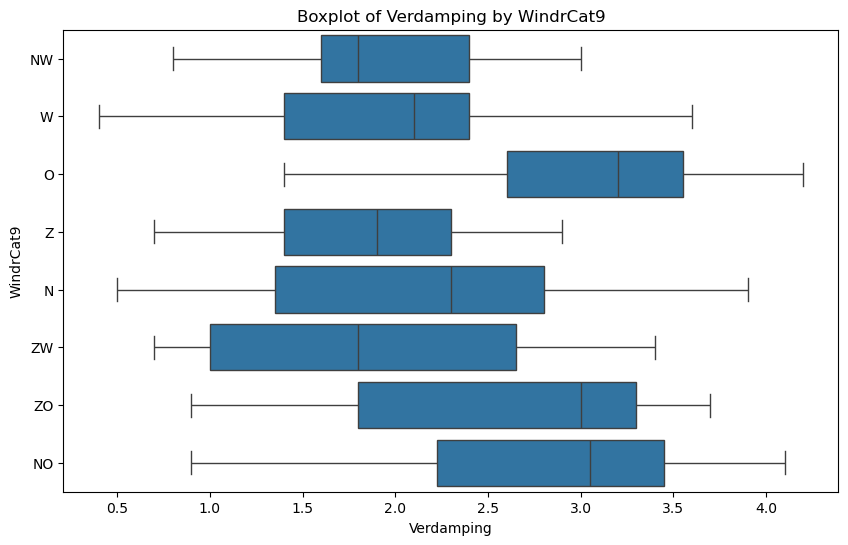

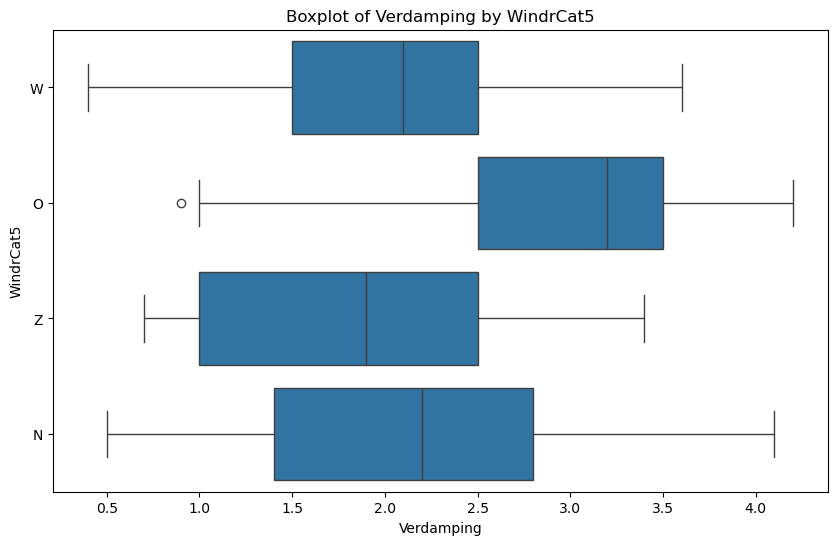

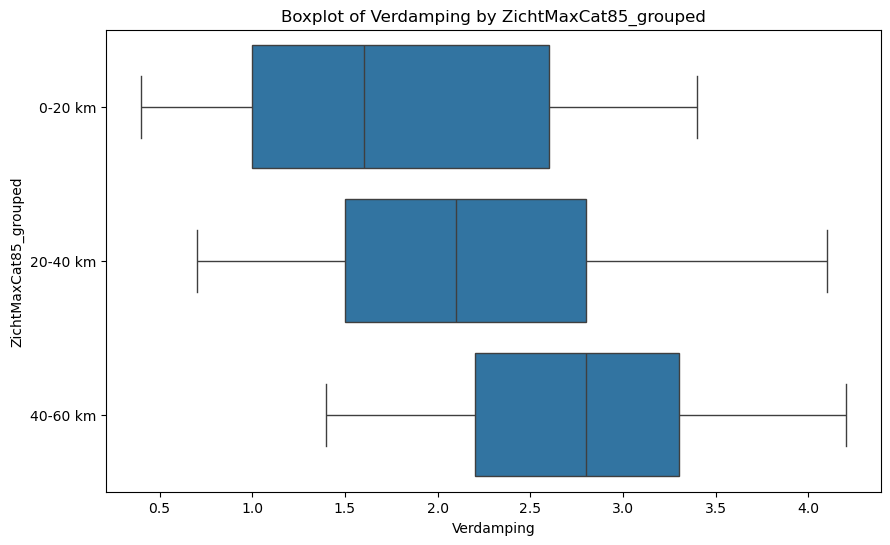

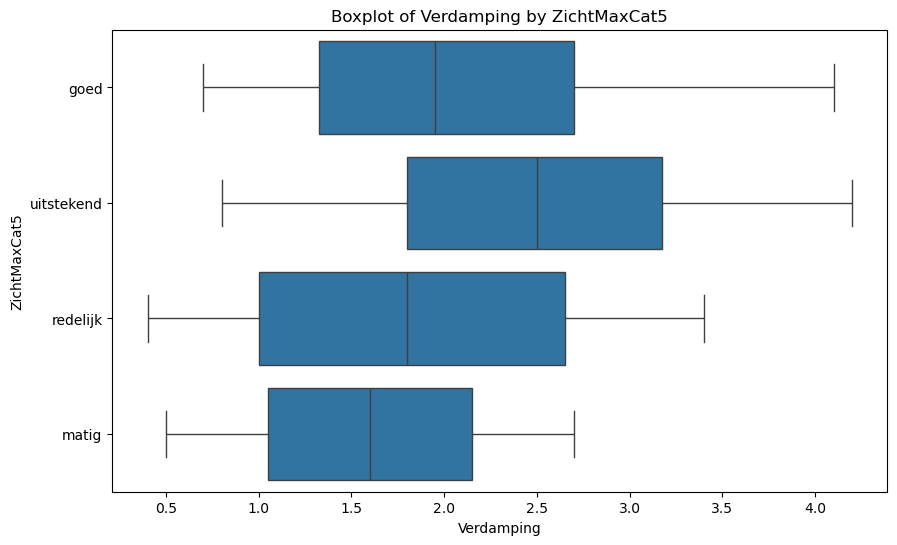

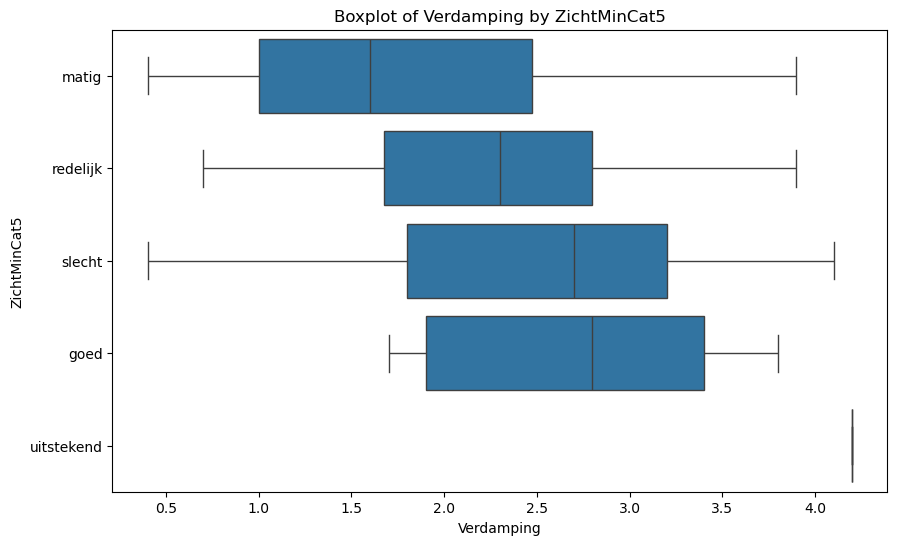

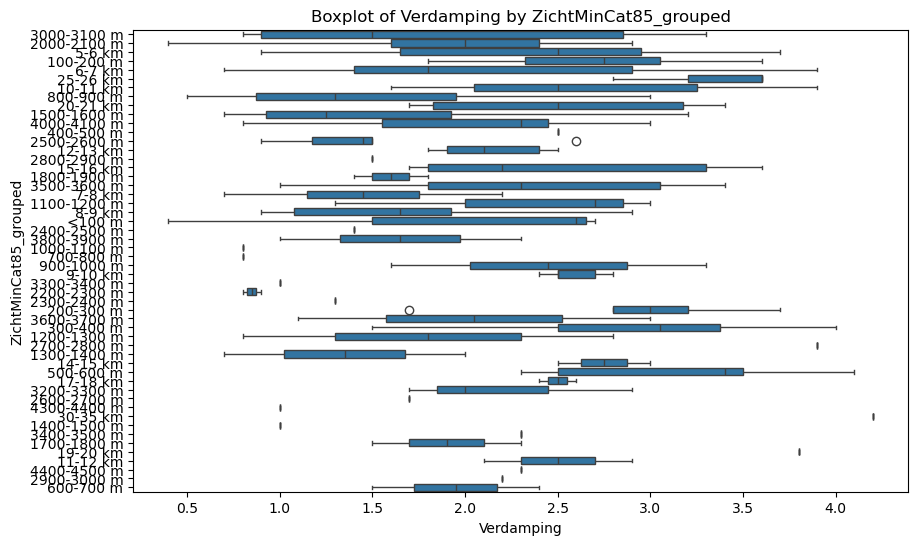

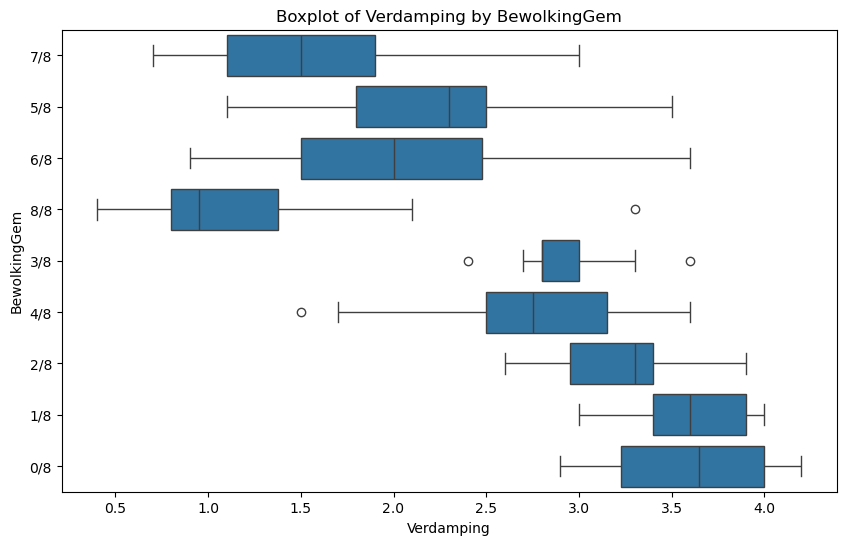

In [45]:
categ_kolommen = ['WindrCat9', 'WindrCat5', 'ZichtMaxCat85_grouped', 'ZichtMaxCat5', 'ZichtMinCat5', 'ZichtMinCat85_grouped', 'BewolkingGem'] 
for kolom in categ_kolommen:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Verdamping'], y=df[kolom])
    plt.title(f'Boxplot of Verdamping by {kolom}')
    plt.xlabel('Verdamping')
    plt.ylabel(kolom)
    plt.show()  

In [ ]:
sns.scatterplot(y=df.Verdamping, x=df.VochtighGem)  
#Om het verband van de nummerieke variabelen met de verdamping verder te analyseren maken we scatterplots. 

In [ ]:
sns.scatterplot(y=df.Verdamping, x=df.VochtighMin)  
#Om het verband van de nummerieke variabelen met de verdamping verder te analyseren maken we scatterplots. 

In [ ]:
sns.scatterplot(y=df.Verdamping, x=df.Zonneschijn)  
#Om het verband van de nummerieke variabelen met de verdamping verder te analyseren maken we scatterplots. 

In [ ]:
sns.scatterplot(y=df.Verdamping, x=df.ZonneschijnPerc)  
#Om het verband van de nummerieke variabelen met de verdamping verder te analyseren maken we scatterplots. 

In [ ]:
sns.scatterplot(y=df.Verdamping, x=df.Straling)  
#Om het verband van de nummerieke variabelen met de verdamping verder te analyseren maken we scatterplots. 

In [ ]:
sns.scatterplot(y=df.Verdamping, x=df.TempMax)  
#Om het verband van de nummerieke variabelen met de verdamping verder te analyseren maken we scatterplots. 

In [ ]:
sns.scatterplot(y=df.Verdamping, x=df.NeerslagDuur)  
#Om het verband van de nummerieke variabelen met de verdamping verder te analyseren maken we scatterplots. 

In [ ]:
# We gaan schattingen doen

# We stellen een model op met OLS. 
model = smf.ols('Verdamping~ VochtighGem + ZichtMinCat5_m + BewolkingGem_kl + ZichtMaxCat5_m + ZichtMaxCat5_g + ZichtMaxCat5_u + ZichtMaxCat5_r +  ZichtMinCat5_r + ZichtMinCat5_s + ZichtMinCat5_g + ZichtMinCat5_u +  BewolkingGem_gr +  ZichtMaxCat85_4500_4600 + ZichtMaxCat85_40_60 + WindrCat5_W + WindrCat5_O + WindrCat5_Z + WindrCat5_N + ZichtMaxCat85_0_20 +  ZichtMaxCat85d_20_40 +  WindrCat9_NW + WindrCat9_W + WindrCat9_NO + WindrCat9_ZO + WindrCat9_O + WindrCat9_Z + WindrCat9_N + WindrCat9_ZW + ZonneschijnPerc + VochtighMin+ Straling + TempMax + , data=df)

# Hierbij schatten we het model
regres = model.fit()

# We printen de samenvatting van de regressieresultaten. 
print(regres.summary())

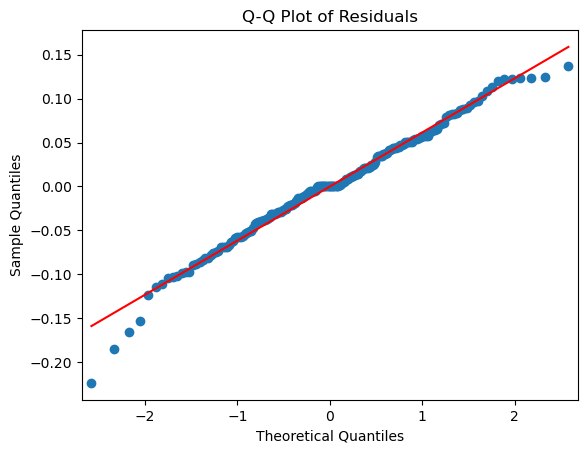

Shapiro-Wilk statistic 0.9859, p-value: 0.0432
t-test statistic for central tendency -0.0000 p-value: 1.0000


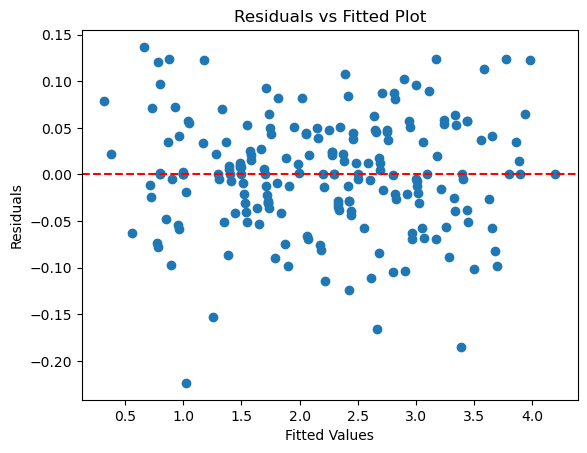

/opt/jupyterhub/anaconda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


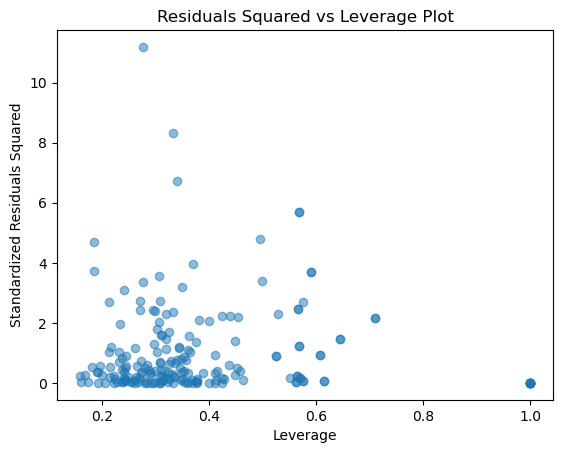

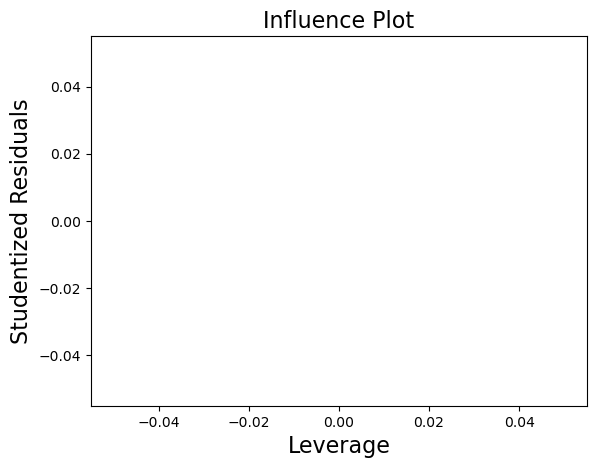

Breusch-Pagan statistic: 64.9429, p-value=0.9390


/opt/jupyterhub/anaconda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/jupyterhub/anaconda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values:
Intercept : 0.0
BewolkingGem[T.1/8] : 4.500639380094784
BewolkingGem[T.2/8] : 4.7752929881962185
BewolkingGem[T.3/8] : 5.51613845880518
BewolkingGem[T.4/8] : 9.802406390400362
BewolkingGem[T.5/8] : 12.648008041948934
BewolkingGem[T.6/8] : 15.668023435245372
BewolkingGem[T.7/8] : 17.235553711219904
BewolkingGem[T.8/8] : 15.20824131304737
WindrCat9[T.NO] : 2.8478837438674067
WindrCat9[T.NW] : 3.137595727698038
WindrCat9[T.O] : 6.706983260776524
WindrCat9[T.W] : 6.076097506682011
WindrCat9[T.Z] : 5.830883035387299
WindrCat9[T.ZO] : 5.480535582892702
WindrCat9[T.ZW] : 6.803771077236732
WindrCat5[T.O] : 6.452394393103097
WindrCat5[T.W] : 5.846206889245682
WindrCat5[T.Z] : 8.236355522335419
ZichtMaxCat85_grouped[T.20-40 km] : 5.091013909389683
ZichtMaxCat85_grouped[T.40-60 km] : 6.69523808969733
ZichtMinCat85_grouped[T.100-200 m] : inf
ZichtMinCat85_grouped[T.1000-1100 m] : inf
ZichtMinCat85_grouped[T.11-12 km] : 1.4671914409403286
ZichtMinCat85_grouped[T.1100-1200 m] : inf
Zicht

In [23]:
# Q-Q plotten om de normaliteit te toetsen
sm.qqplot(regres.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test om de normaliteit te toetsen
shapiro_test = stats.shapiro(regres.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))
    
# Toets om de centraliteit te toetsen 
t_test = stats.ttest_1samp(regres.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plotten om de centraliteit te toetsen 
plt.scatter(regres.fittedvalues, regres.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plotten om de homoscedasticiteit te toetsen 
influence = regres.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan toets om de homoscedasticiteit te toetsen
brpg = sms.het_breuschpagan(regres.resid, model.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check om multicollineariteit te toetsen
X = pd.DataFrame(model.exog,columns=model.exog_names)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns):
    print(col, ":", vif[i])

**Conclusie:** Op basis van de spreiding van de Residuals vs Fitted plot en Residuals vs Leverage plot nemen de homoscedasticiteit in twijfel. Daarnaast geldt ook dat de VIF waarde te groot is, dus op basis van de voorwaarden om te controleren of ons lineair regressiemodel statistisch valide is, nemen wij dit model niet.